In [504]:
import pandas as pd

In [505]:
df = pd.read_csv("housing_ny.csv")

In [506]:
#Looking into what datatypes are for each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       9893 non-null   int64  
 1   url                      9893 non-null   object 
 2   region                   9893 non-null   object 
 3   region_url               9893 non-null   object 
 4   price                    9893 non-null   int64  
 5   type                     9893 non-null   object 
 6   sqfeet                   9893 non-null   int64  
 7   beds                     9893 non-null   int64  
 8   baths                    9893 non-null   float64
 9   cats_allowed             9893 non-null   int64  
 10  dogs_allowed             9893 non-null   int64  
 11  smoking_allowed          9893 non-null   int64  
 12  wheelchair_access        9893 non-null   int64  
 13  electric_vehicle_charge  9893 non-null   int64  
 14  comes_furnished         

In [507]:
# Changing object field to int, float, or str

# Conversion of the string fields
df['region'] = df['region'].astype(str)
df['type'] = df['type'].astype(str)
df['laundry_options'] = df['laundry_options'].astype(str)
df['parking_options'] = df['parking_options'].astype(str)

# Conversion of the object fields 
df['price'] = df['price'].astype(float)

In [508]:
df.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039954484,https://buffalo.craigslist.org/apa/d/buffalo-h...,buffalo,https://buffalo.craigslist.org,1280.0,loft,1078,2,2.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00p0p_5EWF0L2evd...,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny
1,7035781383,https://buffalo.craigslist.org/apa/d/buffalo-h...,buffalo,https://buffalo.craigslist.org,1280.0,loft,1078,2,2.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00p0p_5EWF0L2evd...,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny
2,7030820189,https://ithaca.craigslist.org/apa/d/ithaca-the...,ithaca,https://ithaca.craigslist.org,1270.0,apartment,850,2,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00g0g_7usXABlZvi...,To schedule a tour We now book our tour appoin...,42.4406,-76.4966,ny


In [509]:
# clean up the data: removing columns with url 
df.drop(['url'], axis = 1, inplace=True) 
df.drop(['region_url'], axis = 1, inplace=True) 
df.drop(['image_url'], axis = 1, inplace=True) 

In [510]:
# All the URL columns are gone!
df.head(3)

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
0,7039954484,buffalo,1280.0,loft,1078,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny
1,7035781383,buffalo,1280.0,loft,1078,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny
2,7030820189,ithaca,1270.0,apartment,850,2,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,To schedule a tour We now book our tour appoin...,42.4406,-76.4966,ny


In [511]:
# Apply standard function 
df[['price','sqfeet','beds','baths']].describe()

,price,sqfeet,beds,baths
count,9893.000000,9893.000000,9893.000000,9893.000000
mean,1321.355201,1249.308703,2.013747,1.325533
std,714.009956,14210.838394,0.976686,0.537407
min,123.000000,0.000000,0.000000,0.000000
25%,865.000000,775.000000,1.000000,1.000000
50%,1110.000000,982.000000,2.000000,1.000000
75%,1503.000000,1203.000000,3.000000,2.000000
max,9200.000000,999999.000000,8.000000,4.000000


In [512]:
#How many listings per region : Applying Groupby 
Listings_per_Region = df.groupby('region').id.count().sort_values(ascending=False)
Listings_per_Region

region
rochester                  1915
buffalo                    1378
albany                     1240
syracuse                    916
new york city               747
hudson valley               706
ithaca                      638
long island                 569
watertown                   409
binghamton                  275
glens falls                 214
finger lakes                171
potsdam-canton-massena      157
utica-rome-oneida           153
elmira-corning              152
oneonta                      77
plattsburgh-adirondacks      65
catskills                    50
chautauqua                   43
twin tiers NY/PA             18
Name: id, dtype: int64

In [513]:
# How many types are availalbe in listings 
group_type = df.groupby('type')
group_type

In [514]:
# Another way to pull out different types 
df.type.unique()

array(['loft', 'apartment', 'house', 'condo', 'duplex', 'cottage/cabin',
       'manufactured', 'townhouse', 'flat', 'in-law'], dtype=object)

In [515]:
#Show all the listings for type "Apartment"
group_type.get_group('apartment')

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state
2,7030820189,ithaca,1270.0,apartment,850,2,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,To schedule a tour We now book our tour appoin...,42.4406,-76.4966,ny
7,7039436249,syracuse,1600.0,apartment,1600,1,1.0,1,0,1,0,0,0,w/d in unit,off-street parking,1 bed/1 bath available February 1. Private wal...,43.0566,-76.1575,ny
8,7050920951,plattsburgh-adirondacks,2800.0,apartment,1350,4,2.0,0,0,1,0,0,1,laundry on site,nan,"4 bedroom, 2 bath recently renovated. Walking ...",44.6948,-73.4592,ny
9,7049122141,syracuse,1595.0,apartment,1138,2,2.0,1,1,0,0,0,0,w/d in unit,detached garage,"CANAL CROSSING APARTMENTS OFFERS UPSCALE, BOUT...",43.0417,-76.2807,ny
12,7047059077,buffalo,975.0,apartment,800,2,1.0,0,0,0,0,0,0,w/d in unit,off-street parking,"3901 Main St, Amherst, NY 14226 Apt #1",42.9630,-78.8048,ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,7006696603,watertown,925.0,apartment,821,1,1.0,1,1,1,0,0,0,w/d in unit,off-street parking,SPECIALS: No application/credit check fee Ame...,43.9494,-76.1133,ny
9889,7006703572,watertown,1134.0,apartment,1499,3,2.0,1,1,1,0,0,0,w/d in unit,detached garage,We currently have a 3 bedroom renovated apartm...,43.9743,-75.9122,ny
9890,7006719502,watertown,1134.0,apartment,1499,3,2.0,1,1,1,0,0,0,w/d in unit,detached garage,We currently have a 3 bedroom renovated apartm...,43.9743,-75.9122,ny
9891,7006708023,watertown,1060.0,apartment,1106,2,1.0,1,1,1,0,0,0,w/d in unit,detached garage,We currently have 2 bedroom apartments availab...,43.9743,-75.9122,ny


In [550]:
df.groupby(['region', 'type', 'beds']).price.min()

region     type          beds
albany     apartment     0        495.0
                         1        510.0
                         2        500.0
                         3        450.0
                         4        450.0
                                  ...  
watertown  manufactured  2        675.0
                         3       1375.0
           townhouse     2        123.0
                         3        975.0
                         4       1000.0
Name: price, Length: 415, dtype: float64

In [517]:
#property less than $2,000
lowprice_df = df[df['price']< 2000]
len(lowprice_df)
#Total 8,534 listings are under $2,000

8534

In [518]:
# Calculating yearly rent by using "apply" method
def yearly_rent_calculation(number):
    return float(number) * 12

df['yearly_rent_calculation'] = df['price'].apply(yearly_rent_calculation)

In [519]:
df.head(3)
#yearly rent shown in the last column

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long,state,yearly_rent_calculation
0,7039954484,buffalo,1280.0,loft,1078,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny,15360.0
1,7035781383,buffalo,1280.0,loft,1078,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,Location - School Lofts at Abbott! $1280/mo - ...,42.8517,-78.8155,ny,15360.0
2,7030820189,ithaca,1270.0,apartment,850,2,1.0,1,1,1,0,0,0,laundry in bldg,off-street parking,To schedule a tour We now book our tour appoin...,42.4406,-76.4966,ny,15240.0


In [523]:
# Apply Range for price: My budget is  $5,000, so for anything over $5,000, I am not interested in.  
price_bucket = df['price'].apply(lambda x: '0-1000' if x <= 1000
                                         else '1001-3000' if x <= 3000
                                         else '3001-5000' if x <= 5000
                                         else '> 5000' )
price_bucket_count = price_bucket.value_counts().sort_index(ascending=True)
price_bucket_count

0-1000       4172
1001-3000    5418
3001-5000     271
> 5000         32
Name: price, dtype: int64

In [524]:
import matplotlib.pyplot as plt
import pandas as pd

In [525]:
plt.xkcd()

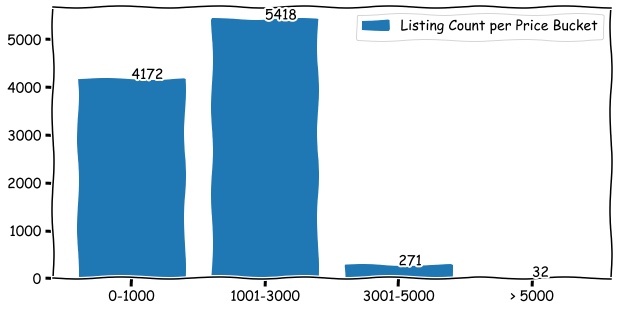

In [526]:
plt.figure(figsize =(10, 5))
plt.bar(price_bucket_count.index, price_bucket_count, label = 'Listing Count per Price Bucket')
plt.legend()
for i, value in enumerate(price_bucket_count):
    plt.text(price_bucket_count.index[i], value, str(value))
plt.show()

In [428]:
%matplotlib inline

In [429]:
df = pd.read_csv("housing_ny.csv")

In [430]:
price_per_bed = df.groupby('beds')[['price']].mean()
price_per_bed

,price
beds,
0,1239.204545
1,1245.084342
2,1296.289836
3,1418.336793
4,1522.101732
5,1730.319149
6,939.058824
7,3402.500000
8,4400.000000


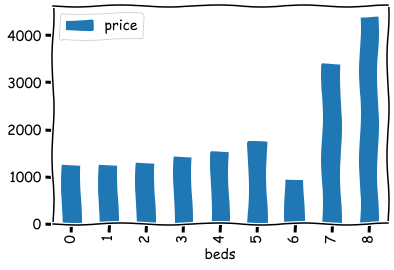

In [531]:
price_per_bed.plot(kind= 'bar')

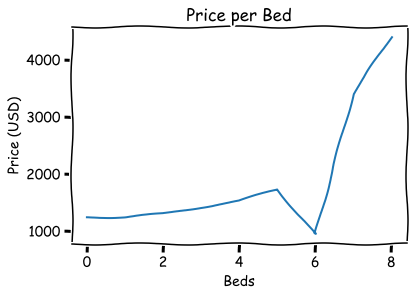

In [543]:
plt.plot(price_per_bed.index, price_per_bed, label = "Price")
plt.xlabel("Beds")
plt.ylabel("Price (USD)")
plt.title("Price per Bed")
plt.show()

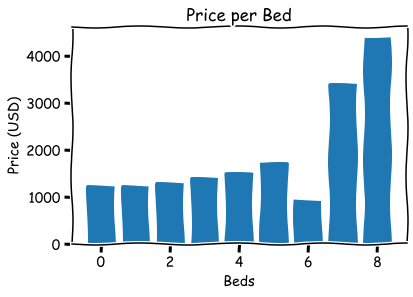

In [548]:
plt.bar(price_per_bed.index, price_per_bed.price, label = "Price")
plt.xlabel("Beds")
plt.ylabel("Price (USD)")
plt.title("Price per Bed")
plt.show()